# IIC-3670 NLP UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- nltk 3.7


____________________________________________________________________________________________________________

## Actividad en clase

Construya un clasificador de documentos **MultinomialNB** sobre el dataset **20Newsgroups**. Para esto haga lo siguiente:

- Limpie el texto del dataset sin usar el lemmatizer.
- Vectorice el corpus usando nela **style** features para cada documento del dataset. Fíjese que para docs con largo 0, nela arrojará una excepción. Reemplace en este caso el vector por un vector de 0s.
- Entrene un clasificador MultinomialNB.  
- Evalúe el clasificador usando **classification_report** sobre la partición de test.
- Muestre la matriz de confusión sobre la partición de test.
- Interprete los resultados. ¿Qué se puede deducir de la matriz de confusión?
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que las L otorgan un bono en la nota final de la asignatura.


***Tiene hasta el final de la clase.***

Vea la descripción del dataset en: https://www.kaggle.com/datasets/crawford/20-newsgroups

_________________________________________________________________________________________________________________

# Solución

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, sent_tokenize
from nltk.stem import WordNetLemmatizer

# Load stop-words
stop_words = set(stopwords.words('english'))

# Initialize tokenizer
# It's also possible to try with a stemmer or to mix a stemmer and a lemmatizer
tokenizer = RegexpTokenizer('[\'a-zA-Z]+')

# Initialize lemmatizer
# lemmatizer = WordNetLemmatizer()

def tokenize(document):
    words = []

    for sentence in sent_tokenize(document):
        tokens = [t.lower() for t in tokenizer.tokenize(sentence) if t.lower() not in stop_words and len(t) > 2]
        words += tokens

    text = ' '.join(words)
    return text


In [3]:
train_docs = []
test_docs = []

for raw_text in newsgroups_train.data:
    text = tokenize(raw_text)
    train_docs.append(text)
    
for raw_text in newsgroups_test.data:
    text = tokenize(raw_text)
    test_docs.append(text)
    

In [4]:
from nela_features.nela_features import NELAFeatureExtractor

nela = NELAFeatureExtractor()

In [5]:
train_vectors = []
null_vector = [0] * 50

for doc in train_docs:
    if len(doc) > 0:
        feature_vector, feature_names = nela.extract_style(doc)
    else:
        feature_vector = null_vector
    train_vectors.append(feature_vector)
    

In [6]:
test_vectors = []

for doc in test_docs:
    if len(doc) > 0:
        feature_vector, feature_names = nela.extract_style(doc)
    else:
        feature_vector = null_vector
    test_vectors.append(feature_vector)
    

In [7]:
import numpy as np

vectors_train=np.array([np.array(xi) for xi in train_vectors])
vectors_test=np.array([np.array(xi) for xi in test_vectors])

In [8]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(vectors_train, newsgroups_train.target)
clf.score(vectors_test, newsgroups_test.target)

0.11205523101433883

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Y_predict = clf.predict(vectors_test)
print(classification_report(newsgroups_test.target, Y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       319
           1       0.12      0.05      0.07       389
           2       0.11      0.09      0.10       394
           3       0.09      0.05      0.06       392
           4       0.20      0.00      0.01       385
           5       0.34      0.24      0.28       395
           6       0.18      0.50      0.26       390
           7       0.10      0.04      0.06       396
           8       0.10      0.23      0.14       398
           9       0.12      0.12      0.12       397
          10       0.05      0.15      0.08       399
          11       0.08      0.06      0.07       396
          12       0.00      0.00      0.00       393
          13       0.09      0.17      0.12       396
          14       0.08      0.03      0.05       394
          15       0.09      0.41      0.15       398
          16       0.00      0.00      0.00       364
          17       0.08    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
import itertools, matplotlib.pyplot as plt, numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


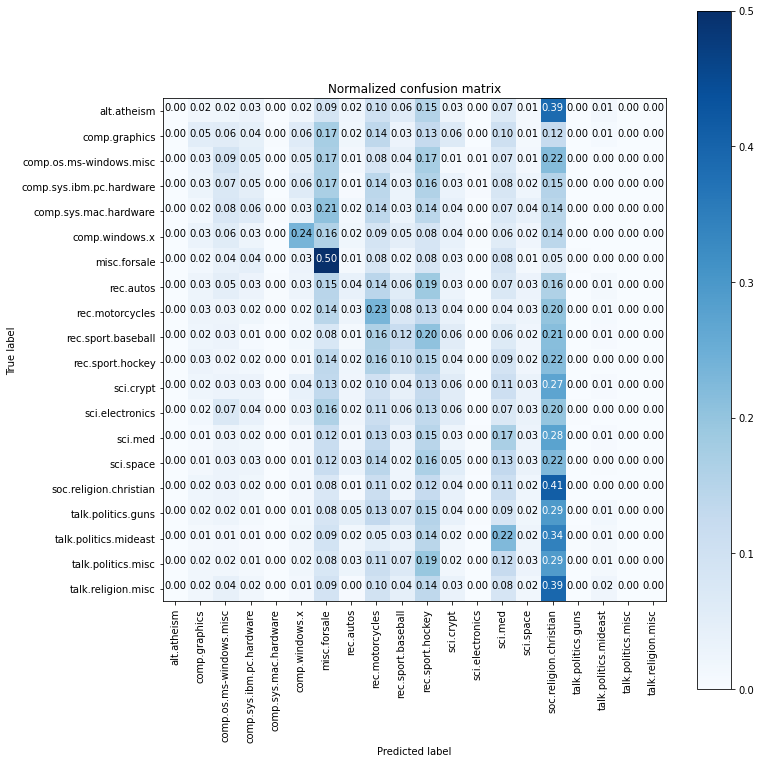

In [11]:
# Compute confusion matrix

cnf_matrix = confusion_matrix(newsgroups_test.target, Y_predict)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(11, 11))
plot_confusion_matrix(cnf_matrix, classes=newsgroups_train.target_names, normalize=True, title='Normalized confusion matrix')

plt.show()

## Las características de estilo son descriptivas de algunas clases de noticias, entre ellas destaca misc forsale.